<a href="https://colab.research.google.com/github/agus-astolfo/Data_Science_I/blob/main/ProyectDS_ParteI_Astolfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PRIMERA ENTREGA DATA SCIENCE 1**




##**Dataset de "Predicción del riesgo de ataque cardíaco"**





###**Resumen de la problematica**

El presente set de datos prentende profundizar en la problematica de la salud cardíaca buscando predictores respecto a posibles ataques cardíacos o infartos agudos de miocárdio (IAM), ya que estos siguen siguen siendo un problema de salud mundial. Por lo tanto, buscar indicadores o predictores de la enfermedad utilizando analisis predictivo o maching learning con el fin de modificar conductas, para minimizar los riesgos y mejorar los tratamientos actuales, es de gran ayuda el sistema de salud tanto a nivel de investigación como clínico.

Este set de datos continen diversos atributos,  que van desde la identidicación del paciente, sexo, edad, hábitos - tabaquismo, consumo de alcohol, alimentación, ejercicio, etc-, parámetros de clinicos y del laboratorio - presión arterial, ritmo cardíaco, concentración de colesterol, etc-, datos demográficos -pais de residencia, hemisferios, etc-, entre otros, con el fin de establecer que relación o relaciones existen entre ellas que puedan predecir la probabilidad de padecer IAM. En resumen, el objetivo máximo es que se pueda llegar a una mejora a nivel mundial de esta patólogia al conocer y disminuir los factores de riesgo predisponentes.

Este set de datos fue obtenido de la página Kaggle siguiendo el siguente link https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset



##**Análisis exploratorio inicial**

Se realiza un análisis exploratorio inicial donde se muestra un resumen del dataset (DS) y se realiza una descripcion mínima del mismo.

###**Importación de librerias y acceso al dataset desde GitHub**

Primero se importan las librerias a utilizar siguiendo el siguiente código:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Luego se procede a tener acceso al DS corriendo el siguiente código, utilizando una dirección *url* del raw data del repositorio de GitHub, de esta forma no se requiere que tercerros tengan que tener acceso a la cuenta de Google Drive para poder correr los códigos. Este código permite que la notebook lea el archivo .csv que se utilizará como DS. Tener en cuenta que la presente notebook se guardara en el mismo repositorio de GitHub.

Además, utilizando los métodos *.head* e *.info* se observa un resumen de la información que contiene el DS.

In [2]:
url='https://raw.githubusercontent.com/agus-astolfo/Data_Science_I/refs/heads/main/heart_attack_prediction_dataset.csv'
df_harp= pd.read_csv(url, sep=',')
df_harp.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df_harp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

Se puede observar que el DS se compone de 8763 entidades con 25 atributos y que no contiene datos nulos.

###**Descripción de los atributos**


Se explicará brevemente cuales son los atributos y que significan cada uno de ellos:

*   ***Patient ID***: identificador univoco del paciente.
*   ***Age***: edad del paciente en años.
*   ***Sex***: genero del paciente (M= maculino, F=femenino).
*   ***Cholesterol***: nivel o concentración (mg/dL) de colesterol en suero del paciente.
*   ***Blood Pressure***: Presión atererial (sistólica/diasteolica).
*   ***Heart Rate***: ritmo cardíaco, medido en pulsaciones por minuto.
*   ***Diabetes***: si el paciente tiene (Y=Yes/Si) o no tiene (N=no) diabetes.
*   ***Family History***: si tiene o no tiene antecedentes familiares de enfermedad cardíaca (1=Yes/Si, 0=No)
*   ***Smoking***: status de tabaquismo del paciente (fumador =1, no fumador =0)
*  ***Obesity***: status de obesidadd del paciente (obeso =1, no obeso =0).
*   ***Alcohol Consuption***: Nivel de consumo de alcohol por el paciente (none [no consume]/Light[bajo consumo]/Moderate[consumo moderado]/Heavy[alto consumo])
*   ***Exercise Hours Per Week***: cantidad o número de horas que realiza ejercicio por semana.
*   ***Diet***: Hábitos dietararios del paciente (Healthy [saludable]/ Average [promedio]/ Unhealthy [no saludable]).
*   ***Previous Heart Problems***: Problemas cardíacos anteriores (1=Yes/Si, 0=No).
*   ***Medication Use***: Uso de medicamentos por el paciente (1=Yes/Si, 0=No).
*   ***Stress Level***: Nivel de estres reportado por el paciente (1-10), siendo 1 nada estresado y 10 muy estresado.
*   ***Sedentary Hours Per Day***: Cantidad de horas de actividad sedentaria por dia.
*   ***Income***: ingresos del paciente (USD$).
*   ***BMI***: indice de masa corporal.
*   ***Tryglycerides***: nivel o concentración (mg/dL) de triglicéridos en suero del paciente.
*   ***Physical Activity Days Per Week***: Cantidades de dias que el paciente realiza actividad física en la semana.
*   ***Sleep Hours Per Day***: Horas de sueño por dia.
*   ***Country***: Pais de residencia del paciente.
*   ***Continent***: Continente en el que reside el paciente.
*   ***Hemisphere:*** Hemisferio en el que reside el paciente.
*   ***Heart Attack Risk***: Presencia de riesgo de ataque cardíaco (1=Yes/Si, 0=No).














###**Destinatario de uso**

Esta destinado a brindar información relevante que ayude tanto a profesionales de la salud como a investigadores a abordar la problematica desde otra mirada, y darle herramientas para poder ayudar al pacientes desde tratamientos a conductas médicas que ayuden a prevenir el riesgo de IAM.

##**Objetivos**


A partir del presente DS suergen los siguientes interrogantes


1. Dentro de la población que tiene risego de padecer ataque cardíaco, evaluar la distribución de edades y sexo.
2. Determinar la relación del riesgo de sufrir ataque cadíaco para hombres y mujeres, con: sedentarismo, las horas de ejercicio por semana, las horas de descanso por día y el nivel de estres.
3. Dentro de los parametro de laboratorio y clinicos, evaluar si alguno es el biomarcador relevante como predictor.

###**Objetivo 1**


Este objertivo es:
*'Dentro de la población que tiene risego de padecer ataque cardíaco, evaluar la distribución de edades y sexo.'*

Para ello lo primero que se debe hacer es crear un nuevo dataframe, al cual llamaremos "data_riego_si", el cual solo nos posicionamos en aquella subpoblación de pacientes que si tienen riesgo de padecer ataque cardiaco. Esto se muestra en el siguiente código

In [3]:
data_riesgo_si = df_harp[df_harp['Heart Attack Risk'] == 1]

Luego para poder evaluar la distibución de las edades dentro de esa subpoblación y a la vez categorizarlo por sexo, se realizan distintos gráficos.
Primeramente, se utiliza boxplot, que permite evidenciar resultados anómalos, y luego se realiza un histograma.

Para buscar si existen datos anómalos (outliers) en la subpoblación a estudiar, se realiza un boxplot (Diagrama de caja)

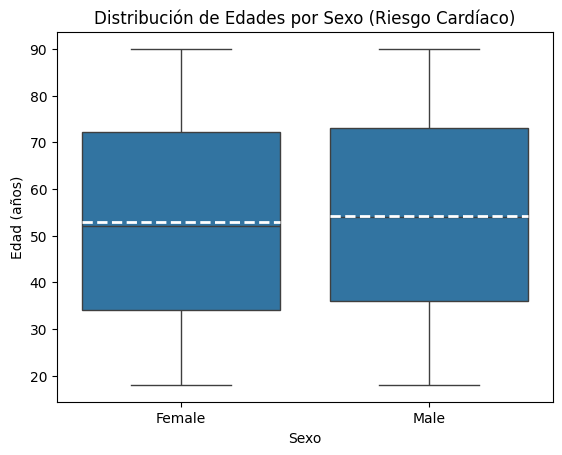

In [4]:
sns.boxplot(data=data_riesgo_si, x='Sex', y='Age',showmeans =True, meanline=True, meanprops={'color': 'white', 'linewidth': 2})
plt.title('Distribución de Edades por Sexo (Riesgo Cardíaco)')
plt.xlabel('Sexo')
plt.ylabel('Edad (años)')
plt.show()


Se observa que sobre la subpoblación de pacientes con riesgo de ataque cardíaco, la distribución de edades para ambos sexos es muy similar, es decir los tamaños de las cajas, comprendidos en tre los cuartiles 1 y 3, asi como la mediana, la media (linea entrecortada),  mínimos y máximos son similares.
Para evidenciar esto en forma numérica se decide realizar un método de descripción, para la edad y sexo, para hombres, mujeres y total siguiendo el siguiente código:


Primero se debe filtrar las poblaciones de femeninos y masculinos

In [5]:
hombres = data_riesgo_si[data_riesgo_si['Sex'] == 'Male']
mujeres = data_riesgo_si[data_riesgo_si['Sex'] == 'Female']

Luego hacer las descripción estadistica por cada sexo y la total

In [6]:
descripcion_hombres = hombres ['Age'].describe()
descripcion_mujeres = mujeres['Age'].describe()
descripcion_total = data_riesgo_si['Age'].describe()

Finalmente para que todos queden en una tabla, concantenarlos en un nuevo dataframe llamado descripcion_completa y correr este:

*Nota*: la idea inicial era trasponer columnas y filas, pero al escribir el codigo y ejecultarlo se obtiene el mismo resultado, sin trasponer.

In [7]:
descripcion_completa = pd.concat([descripcion_hombres, descripcion_mujeres, descripcion_total], keys=['Hombres', 'Mujeres', 'Total'])

print(descripcion_completa)


Hombres  count    2195.000000
         mean       54.287927
         std        21.378390
         min        18.000000
         25%        36.000000
         50%        54.000000
         75%        73.000000
         max        90.000000
Mujeres  count     944.000000
         mean       52.965042
         std        21.275994
         min        18.000000
         25%        34.000000
         50%        52.000000
         75%        72.250000
         max        90.000000
Total    count    3139.000000
         mean       53.890092
         std        21.352881
         min        18.000000
         25%        35.000000
         50%        54.000000
         75%        73.000000
         max        90.000000
Name: Age, dtype: float64


Esta descripción refuerza lo observado en el boxplot, y nos permite evidenciar que en este set de datos hay mayor cantidad (mas del doble) de pacientes masculinos con riesgo de padecer ataque cardíaco.

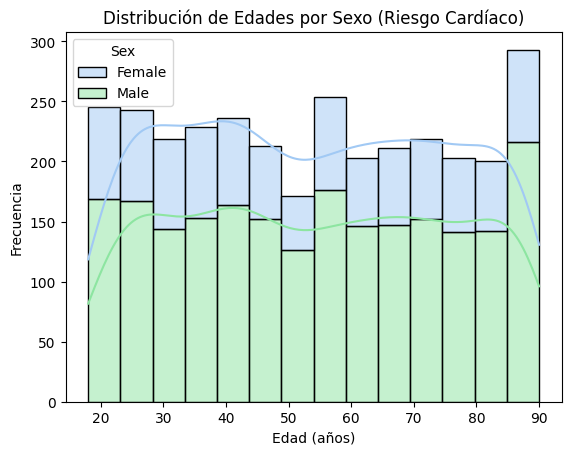

In [8]:
sns.histplot(data=data_riesgo_si, x='Age', hue='Sex',multiple='stack', kde=True, palette='pastel6')
plt.title('Distribución de Edades por Sexo (Riesgo Cardíaco)')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()


En el histograma se puede observar que la distribución en muy similar entre hombres y mujeres. Se podria decir que la distribución es unifome. Además que hay dos rangos de edades, una cercana a los 60 años y otra cercana a los 90 años donde las poblacion masculina presenta mayor riego de ataque cardíaco, ya que la frecuencia es mayor. También se puede observar que cercano a los 50 años el número de pacientes masculinos con riesgo de padecer ataque cardíaco es el mas bajo.

Como este gráfico no permite evidenciar adecuadamente esto mismo para la población femenina, se decide realizar también un histograma pero a nivel de figuras y separando por sexo en distintos gráficos.


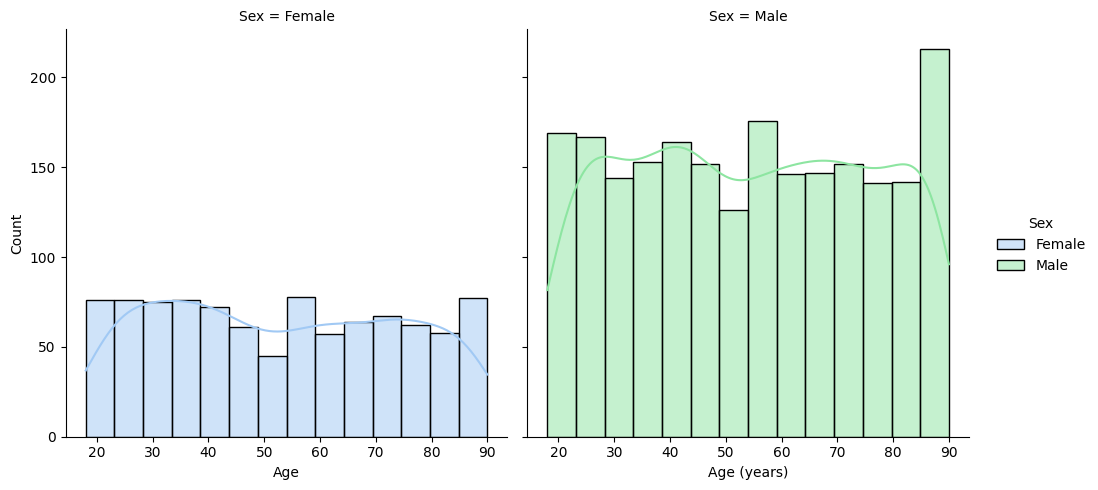

In [9]:
sns.displot(data=data_riesgo_si, x='Age', hue='Sex',col='Sex', kde=True, palette='pastel6')

plt.xlabel('Age (years)')
plt.ylabel('Frecuency')
plt.show()

En este caso se puede observar que las muejres presentan un patron muy similar que los hombres pero con frecuencias menos maracadas, pero existiendo el menor nivel pasando los 50 años que luego aumenta siendo el máximo  cercano a los 60 años.

Respecto a la población masculina, se evidencia aun mas la mayor frecuenacia de pacientes con riesgo de padecer etaque cardíaco con edades cercanas a los 90 años, por sobre el resto de las edades.

###**Objetivo 2**

Este objertivo es:
*'Determinar la relación del riesgo de sufrir ataque cadíaco para hombres y mujeres, con: sedentarismo, las horas de ejercicio por semana, las horas de descanso por día y el nivel de estres'*.

Se analizan cada una individialmente utilizando boxplot o catplot.

####**Sedentarismo**

Para evaluar la relacion que existe entre el sedentarismo (calculado como cantidad de horas por dia que el paciente se encuentra sedentario) con el riesgo de ataque cardíaco o Riesgo de IAM se realiza un boxplot. Este mismo se segmenta por sexo.

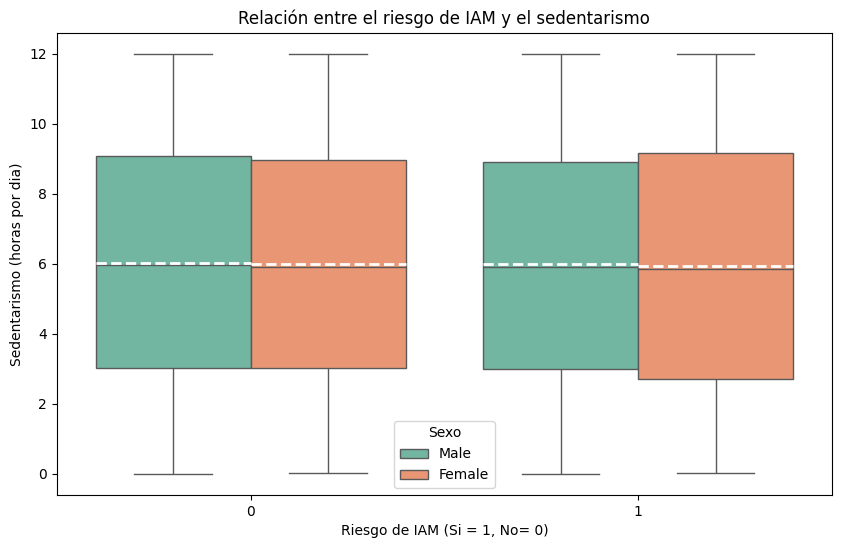

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Attack Risk', y='Sedentary Hours Per Day', data=df_harp, hue='Sex',showmeans =True, meanline=True, meanprops={'color': 'white', 'linewidth': 2}, palette='Set2')
plt.title('Relación entre el riesgo de IAM y el sedentarismo')
plt.xlabel('Riesgo de IAM (Si = 1, No= 0)')
plt.ylabel('Sedentarismo (horas por dia)')
plt.legend(title='Sexo')
plt.show()

Este gráfico muestra que los datos son simétricos. No se observan datos anómalos (outliers). Las medianas (linea negra en el centro de la caja) como las medias (linea blanca) son iguales o muy cercanas entre los pacientes que tienen o no riego de IAM y entre hombres y mujeres. Se observa una mayor dispersion de datos en las mujerescon riesgo de IAM.

En ambos casos no se observa una diferencia marcada entre pacientes con y sin riesgo de IAM, analizando se el sedentarismo.

Se decide agregar un descripcion de las horas de sedentarismo por dia discriminado por sexo y totales para tener una noción de las tandencias centrales, número de pacientes de cada sexo, etc.

In [11]:
hombres2 = df_harp[df_harp['Sex'] == 'Male']
mujeres2 = df_harp[df_harp['Sex'] == 'Female']
descripcion_hombres2 = hombres2 ['Sedentary Hours Per Day'].describe()
descripcion_mujeres2 = mujeres2['Sedentary Hours Per Day'].describe()
descripcion_total2 = df_harp['Sedentary Hours Per Day'].describe()
descripcion_completa2 = pd.concat([descripcion_hombres2, descripcion_mujeres2, descripcion_total2], keys=['Hombres', 'Mujeres', 'Total'])
print(descripcion_completa2)

Hombres  count    6111.000000
         mean        6.000528
         std         3.462506
         min         0.001263
         25%         3.011728
         50%         5.947226
         75%         9.006433
         max        11.992341
Mujeres  count    2652.000000
         mean        5.977934
         std         3.475824
         min         0.008307
         25%         2.964552
         50%         5.868854
         75%         9.043740
         max        11.999313
Total    count    8763.000000
         mean        5.993690
         std         3.466359
         min         0.001263
         25%         2.998794
         50%         5.933622
         75%         9.019124
         max        11.999313
Name: Sedentary Hours Per Day, dtype: float64


Como anteriormente se observó en el objetivo 1,  en este caso, utilizando toda la población tambien, existen mayor cantidad de pacientes masculinos estudiados por sobre los femeninos, con medias similares.

####**Ejercicio**
Para evaluar la relacion que existe entre el ejercicio (calculado como cantidad de horas por semana que el paciente se realiza ejercicio) con el riesgo de ataque cardíaco o Riesgo de IAM se realiza un catplot. Este mismo se segmenta por sexo.

<Figure size 1000x600 with 0 Axes>

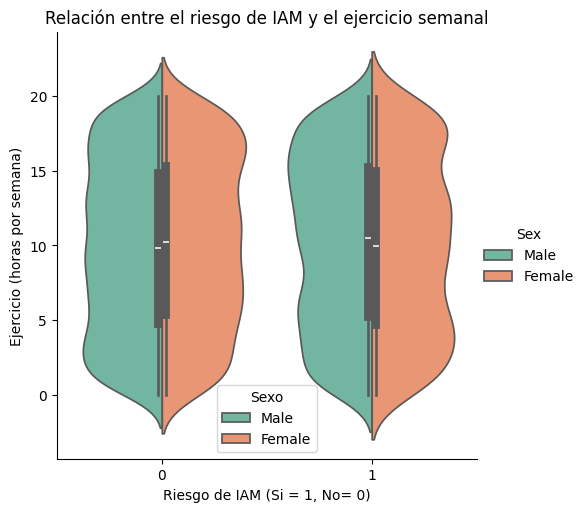

In [12]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df_harp, x='Heart Attack Risk', y='Exercise Hours Per Week', hue='Sex', kind='violin',split=True,palette='Set2')
plt.title('Relación entre el riesgo de IAM y el ejercicio semanal')
plt.xlabel('Riesgo de IAM (Si = 1, No= 0)')
plt.ylabel('Ejercicio (horas por semana)')
plt.legend(title='Sexo')
plt.show()

Este gráfico muestra que los datos son simeatricos. No se observan datos anómalos (outliers). Las medianas (linea blanca en el centro de la caja) si bien son cercanas entre si, se observa un valor ligeramente aumentado de la mediana en las mujeres  sin riesgo de IAM. Algo similar sucede en los pacientes con riesgo de IAM donde la mediana de los hombres es ligeramente superior a la de la mujeres. Es decir, las mujeres que no tienen riesgo de IAM suelen ejercitarse mas que los hombres, esto se inviernte en el caso de los pacinetes con riesgo de IAM, donde los hombres se suelen ejercitar mas.

En ambos casos no se observa una diferencia entre pacientes con y sin riesgo de IAM.

####**Descanso diario**

Para evaluar la relacion que existe entre el descanso diario (calculado como cantidad de horas por dia que el paciente duerme) con el riesgo de ataque cardíaco o Riesgo de IAM se realiza un boxplot. Este mismo se segmenta por sexo.

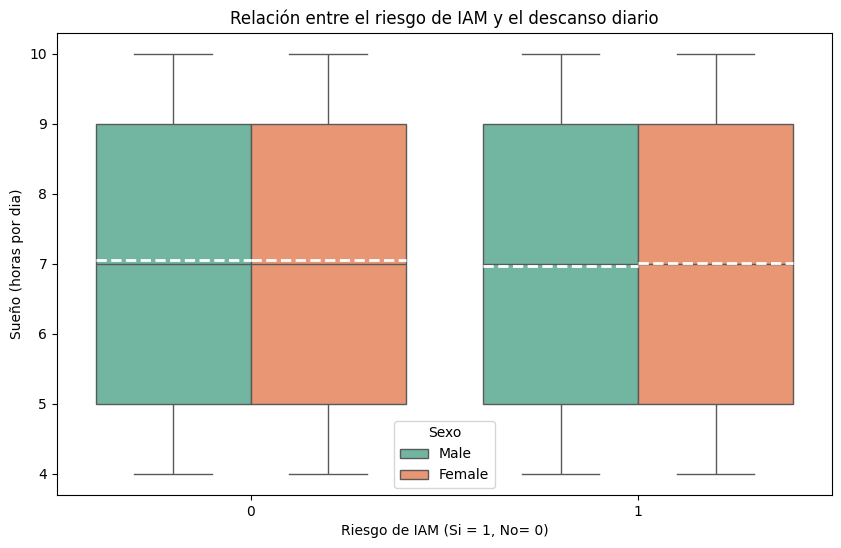

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Attack Risk', y='Sleep Hours Per Day', data=df_harp, hue='Sex', showmeans =True, meanline=True, meanprops={'color': 'white', 'linewidth': 2}, palette='Set2')
plt.title('Relación entre el riesgo de IAM y el descanso diario')
plt.xlabel('Riesgo de IAM (Si = 1, No= 0)')
plt.ylabel('Sueño (horas por dia)')
plt.legend(title='Sexo')
plt.show()

En este gráfico se observa que los datos son simétricos, casi iguales. No se observan datos anómalos (outliers). En el casi de los pacientes sin riesgo de IAM, la media (linea blanca) es apenas superior que la mediana (linea negra). Miestras que en los pacientes con riesgo de IAM, en las mujeres so observa el mismo comportamiento, mientras que en los hombres, la media se encuentra a pensa por debajo de la mediana. En general tanto media como mediana son muy similares. Se observa tambien el mismo nivel de dispersion en general, ya que se observa que en ambos grupos las cajas y los bigotes son praticamente iguales.

En ambos casos no se observa una diferencia entre pacientes con y sin riesgo de IAM.

####**Nivel de estrés**

Para evaluar la relación que existe entre el nivel de estrés (tabulado de 1 a 10 en orden creciente) con el riesgo de ataque cardíaco o Riesgo de IAM se realiza un boxplot. Este mismo se segmenta por sexo.

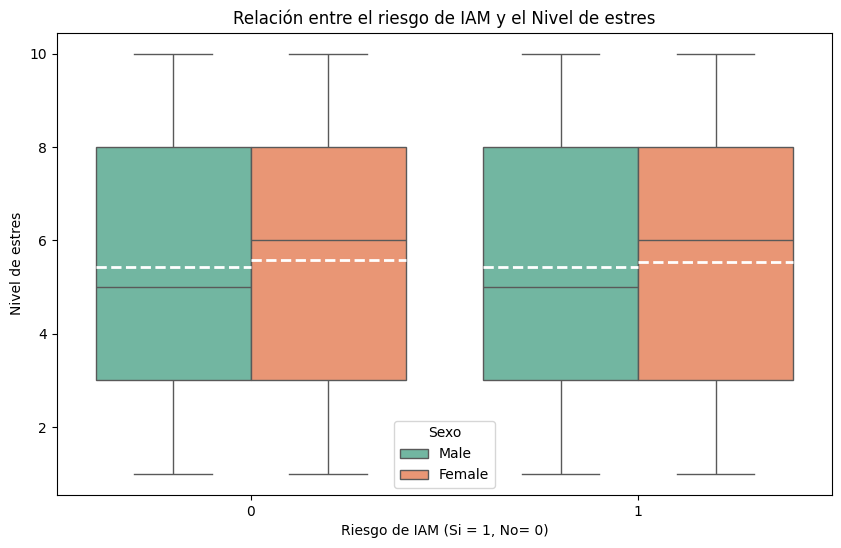

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Attack Risk', y='Stress Level', data=df_harp, hue='Sex', showmeans =True, meanline=True, meanprops={'color': 'white', 'linewidth': 2},  palette='Set2')
plt.title('Relación entre el riesgo de IAM y el Nivel de estrés')
plt.xlabel('Riesgo de IAM (Si = 1, No= 0)')
plt.ylabel('Nivel de estrés')
plt.legend(title='Sexo')
plt.show()

Se observa cierta asimetria de los datos, ya que la mediana no se encuetra en el centro de la caja. De esta forma los pacientes masculinos tienen una distribución asimétrica positiva (mediana hacia el cuartilo 1), mientras que los pacientes femeninos la distribución asimétrica es negativa (mediana hacia el cuartilo 3). Los datos tienen el mismo nivel de dispersión reflejado por la longitud de la caja y los bigotes. No se observan datos anómalos (outliers).
En este caso la mediana seria un mejor predictor de la tendencia central que la media.

Lo que se puede concluir es que las mujeres suelen resgitrar mayor nivel de estrés que los hombres ya sean con o sin riesgo de IAM.


###**Objetivo 3**

Este objertivo es:
*'Dentro de los parametro de laboratorio y clinicos, evaluar si alguno es el biomarcador relevante como predictor'*.

Se toma como parámetros de laboratorio y clínicos, la concetración de colesterol y triglicéridos en suero, ritmo caríaco e Indice de Masa Corporal (BMI). Se decide no incluir a la presión arterial ya que esta se encuentra como objeto ya que representa los valores de Presión atererial (sistólica/diasteolica).



####**Distribución de los datos**

Se analizan cada una individialmente utilizando violinplot.

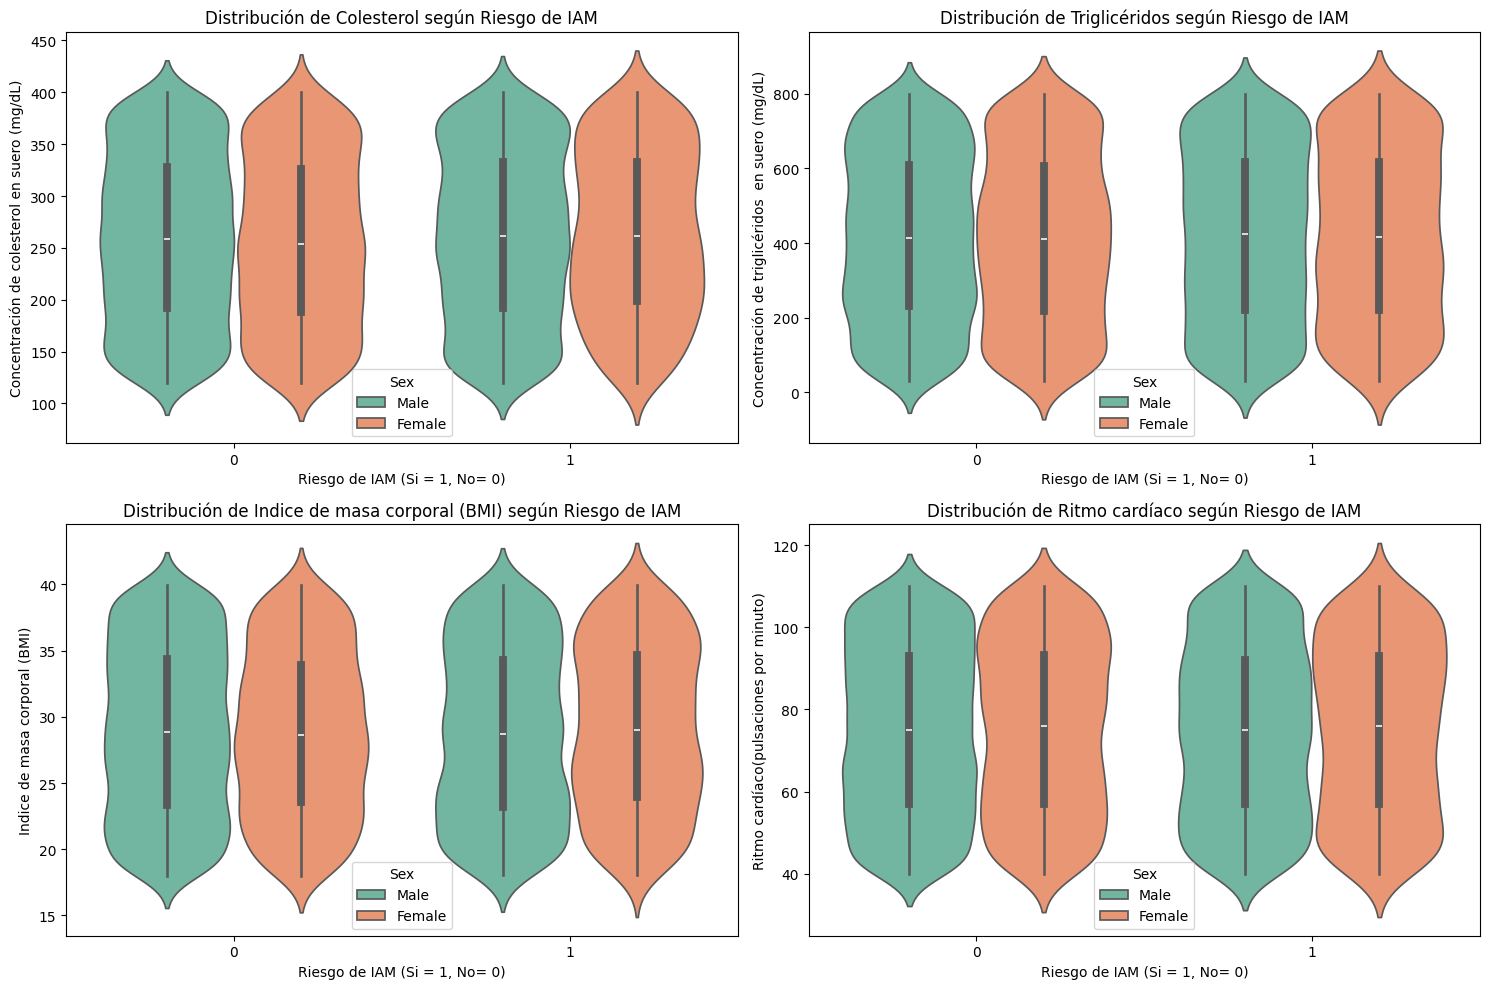

In [15]:
# Crear gráficos violinplot para cada biomarcador según IAM
plt.figure(figsize=(15, 10))


# Colesterol
plt.subplot(2, 2, 1)
sns.violinplot(x='Heart Attack Risk', y='Cholesterol', hue= 'Sex', data=df_harp, palette='Set2')
plt.title('Distribución de Colesterol según Riesgo de IAM')
plt.xlabel('Riesgo de IAM (Si = 1, No= 0)')
plt.ylabel('Concentración de colesterol en suero (mg/dL)')

# Triglicéridos
plt.subplot(2, 2, 2)
sns.violinplot(x='Heart Attack Risk', y='Triglycerides', hue= 'Sex',data=df_harp, palette='Set2')
plt.title('Distribución de Triglicéridos según Riesgo de IAM')
plt.xlabel('Riesgo de IAM (Si = 1, No= 0)')
plt.ylabel('Concentración de triglicéridos  en suero (mg/dL)')

# BMI
plt.subplot(2, 2, 3)
sns.violinplot(x='Heart Attack Risk', y='BMI', hue= 'Sex', data=df_harp, palette='Set2')
plt.title('Distribución de Indice de masa corporal (BMI) según Riesgo de IAM')
plt.xlabel('Riesgo de IAM (Si = 1, No= 0)')
plt.ylabel('Indice de masa corporal (BMI)')

# Ritmo cardíaco
plt.subplot(2,2, 4)
sns.violinplot(x='Heart Attack Risk', y='Heart Rate',hue= 'Sex',  data=df_harp, palette='Set2')
plt.title('Distribución de Ritmo cardíaco según Riesgo de IAM')
plt.xlabel('Riesgo de IAM (Si = 1, No= 0)')
plt.ylabel('Ritmo cardíaco(pulsaciones por minuto)')

plt.tight_layout()
plt.show()


Se observa un distribución muy similar tanto para los pacientes femeninos y maculinos ya sea que tenga o no riesgo de IAM, para los parámetros de laboratorio y clínicos, la concetración de colesterol y triglicéridos en suero, ritmo caríaco e Indice de Masa Corporal (BMI). No se observan datos atípicos y son simétricos. Tiene una dispersión moderada, ya que las cajas son alargadas.

####**Correlación**

Para poder ver que relación hay entre las variables (posibles biomarcadores) entre si  y si alguno se correlaciona fuentemente con el riesgo de IAM, se decide hacer una figura que muestre esto. En este caso se utilizará heatmap.

Dado que para correlación solo se pueden utilizar números, se decide ya que si bien la mayoria de los atributos a utilizar son de tipo Int64, para no perder información (precisión) de los float en especial del BMI, se deciden pasar los 16 atributos INT64 a float, con el siguiente código:

In [16]:
columns_to_convert = ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes','Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Income', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']

df_harp[columns_to_convert] = df_harp[columns_to_convert].astype(float)

Luego se realiza la correlación sobre un nuevo dataset llamado df_harp_corr que contiene solo aquellos atributos numéricos. Luego se realiza la correlación y se corre el código

In [17]:
df_harp_corr = df_harp.select_dtypes(include=['float'])

correlation_matrix = df_harp_corr.corr()

correlation_matrix

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778
Exercise Hours Per Week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245,0.011133
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.002694,-0.003281,0.015718,-0.019029,0.008537,0.004460,0.000274


Luego se procede a realizar el gráfico de heatmap.

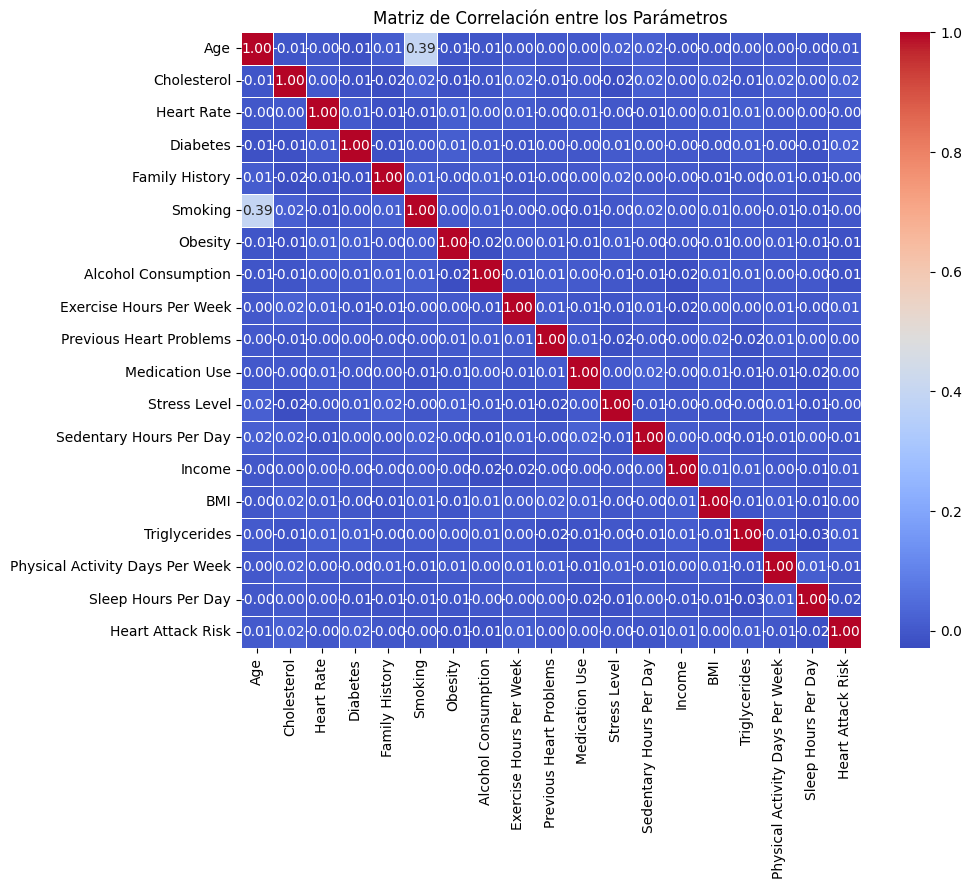

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre los Parámetros')
plt.show()

Solo se observa que el tabaquismo tiene una correlación positiva leve con la edad, es decir que al aumentar la edad aumenta la cantidad de fumadores. En el caso de los atributos propuestos a nivel de laboratorio y clínico, no se observa correlación con el riesgo de IAM.

##**Conclusiones**



Dentro de los pacientes con riesgo de IAM, la distribución de las edades según la categorización por sexo, resultó ser muy parecida entre si.
Se concluye que existen  dos rangos etarios cercano a los 60 años(aproximimadamente entre los 55 y 60 años) y cercano a los 90 años (aproximimadamente entre los 85 y 90 años) donde el riesgo de IAM es mas frecuente en los pacientes. Hay que destacar que donde se observó mayor frecuencia de riesgo de IAM, fue en la población masculina cercano a los 90 años. Mientras que la frecuencia  de riesgo de IAM es menor apenas pasando los 50 años. Esto se vio reflejado en los histogramas.

En el caso de la relacion de sufrir ataque cardíaco tanto en hombre como en mujeres respecto a sedentarismo, las horas de ejercicio por semana, las horas de descanso por semana y el nivel de estrés, se observó que solo con el nivel de estres existe una asimetria respecto a la mediana entre hombres y mujeres, siendo estas las que mas estres refirieron independientemente si tenian o no riesgo de IAM. El resto de las variables resultaron ser simétricas y en todos los casos no se evidención a nivel gráfico una diferencia notoria entre las poblaciones con o sin riesgo, que lleve a pensar a estas variables como posibles predictores.

Los parámetros de laboratorio (concentración de colesterol y triglicéridos en suero) como los clínicos (BMI, ritmo cardíaco) evaluados,  presentan una distirbución muy similar tanto en hombres como en mujeres y en pacientes con y sin riesgo de IAM. En principio, con el análisis realizado, no parecería buenos biomarcadores de prediccion de riesgo de IAM.

Solo se observa que el tabaquismo tiene una correlación positiva leve con la edad, es decir que al aumentar la edad aumenta la cantidad de fumadores. En el caso de los atributos propuestos a nivel de laboratorio y clínico, no se observa correlación con el riesgo de IAM.
